### Importamos librerias

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


### Ejercicio 1

#### Importamos Data Sets

In [209]:
datos_madres=pd.read_excel('./datasets_modelo_parcial/datos_madres.xlsx')
datos_nacimientos=pd.read_csv('./datasets_modelo_parcial/nacimientos.csv',  sep=";", skiprows=3)

In [210]:
print(datos_madres.columns)
datos_madres.head()

Index(['ID', 'ALTURA_M_MUJER', 'PESO_KG_MUJER', 'NUM_CIGARRILLOS_DIA'], dtype='object')


,ID,ALTURA_M_MUJER,PESO_KG_MUJER,NUM_CIGARRILLOS_DIA
0,1,"1,6",45.4,0
1,2,"1,6",61.2,9
2,3,"1,6",52.2,2
3,4,"1,8",86.2,0
4,5,"1,7",56.7,4


In [211]:
print(datos_nacimientos.columns)
datos_nacimientos.head()

Index(['id_madre', 'peso_kg_bebe', 'semanas_gest', 'edad_anios',
       'hijos_previos'],
      dtype='object')


,id_madre,peso_kg_bebe,semanas_gest,edad_anios,hijos_previos
0,1,3057.4,38.8,21,1
1,2,2716.6,38.1,26,0
2,3,3230.8,39.1,18,1
3,4,3473.3,41.8,28,2
4,5,2951.5,38.0,29,3


#### Limpiamos dataset, vamos a verificar primero si podemos unificar los datasets, asi nos ahorramos trabajar con 2 datasets ya que si tenemos un unico nacimiento por id de madre se nos va a hacer mas facil trabajarlo

In [212]:
# Utilizar merge()
df_merged=pd.merge(datos_madres, datos_nacimientos, left_on='ID', right_on='id_madre', how='inner')
df_merged.head()

,ID,ALTURA_M_MUJER,PESO_KG_MUJER,NUM_CIGARRILLOS_DIA,id_madre,peso_kg_bebe,semanas_gest,edad_anios,hijos_previos
0,1,"1,6",45.4,0,1,3057.4,38.8,21,1
1,2,"1,6",61.2,9,2,2716.6,38.1,26,0
2,3,"1,6",52.2,2,3,3230.8,39.1,18,1
3,4,"1,8",86.2,0,4,3473.3,41.8,28,2
4,5,"1,7",56.7,4,5,2951.5,38.0,29,3


Vamos a borrar la columna idMadre ya que tenemos el Id que es el Idmadre de nuestro segundo dataFrame

In [213]:
df_merged = df_merged.drop('id_madre', axis=1)
df_merged.head()

,ID,ALTURA_M_MUJER,PESO_KG_MUJER,NUM_CIGARRILLOS_DIA,peso_kg_bebe,semanas_gest,edad_anios,hijos_previos
0,1,"1,6",45.4,0,3057.4,38.8,21,1
1,2,"1,6",61.2,9,2716.6,38.1,26,0
2,3,"1,6",52.2,2,3230.8,39.1,18,1
3,4,"1,8",86.2,0,3473.3,41.8,28,2
4,5,"1,7",56.7,4,2951.5,38.0,29,3


Una vez que tenemos nuestro df mergeado, podemos trabajar para borrar los valores nulos, duplicados o inconsistentes.

In [214]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   345 non-null    int64  
 1   ALTURA_M_MUJER       345 non-null    object 
 2   PESO_KG_MUJER        345 non-null    float64
 3   NUM_CIGARRILLOS_DIA  345 non-null    int64  
 4   peso_kg_bebe         345 non-null    float64
 5   semanas_gest         345 non-null    float64
 6   edad_anios           345 non-null    int64  
 7   hijos_previos        345 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 21.7+ KB


Podemos ver que tenemos la altura en tipo de dato objeto en vez de alguna variable cuantitativa por ende vamos a pasarla a float

In [215]:
df_merged['ALTURA_M_MUJER'] = df_merged['ALTURA_M_MUJER'].str.replace(',', '.').astype(float)

In [216]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   345 non-null    int64  
 1   ALTURA_M_MUJER       345 non-null    float64
 2   PESO_KG_MUJER        345 non-null    float64
 3   NUM_CIGARRILLOS_DIA  345 non-null    int64  
 4   peso_kg_bebe         345 non-null    float64
 5   semanas_gest         345 non-null    float64
 6   edad_anios           345 non-null    int64  
 7   hijos_previos        345 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 21.7 KB


Podemos ver que ahora es un valor float

In [217]:
df_merged.drop_duplicates()
df_merged.dropna()

,ID,ALTURA_M_MUJER,PESO_KG_MUJER,NUM_CIGARRILLOS_DIA,peso_kg_bebe,semanas_gest,edad_anios,hijos_previos
0,1,1.6,45.4,0,3057.4,38.8,21,1
1,2,1.6,61.2,9,2716.6,38.1,26,0
2,3,1.6,52.2,2,3230.8,39.1,18,1
3,4,1.8,86.2,0,3473.3,41.8,28,2
4,5,1.7,56.7,4,2951.5,38.0,29,3
...,...,...,...,...,...,...,...,...
340,341,1.7,65.3,2,2332.4,34.0,25,2
341,342,1.7,59.0,2,2781.0,36.7,25,2
342,343,1.7,50.8,9,2767.0,37.4,19,2
343,344,1.5,59.0,6,3034.0,38.9,39,5


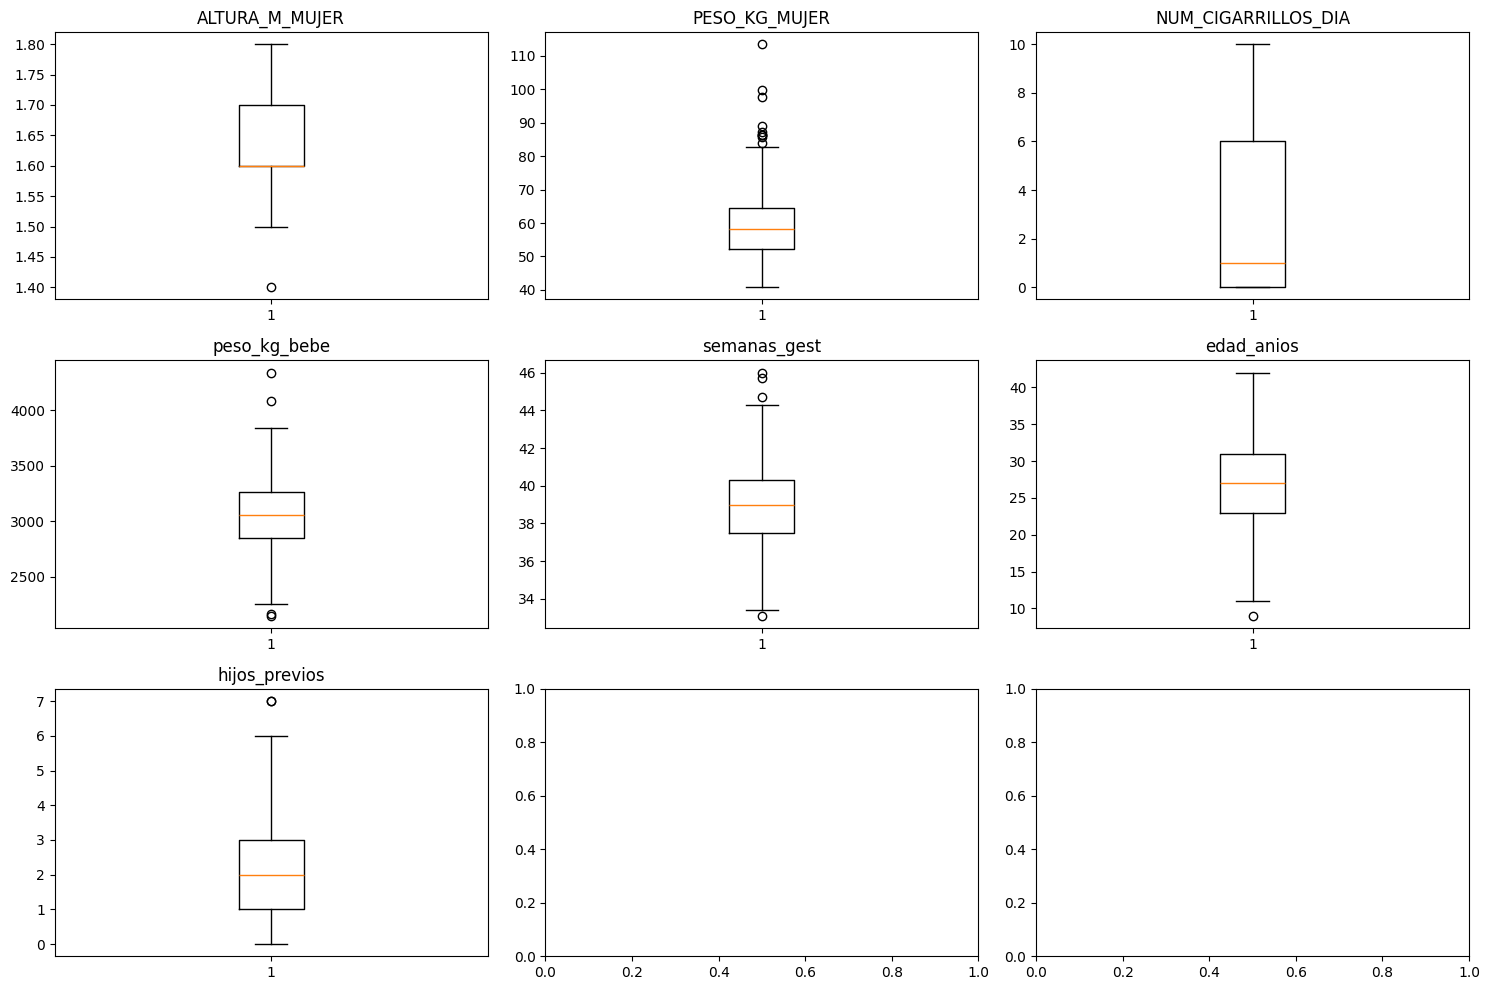

In [218]:
cols = df_merged.columns[1:]

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
   if i < len(axes):
       axes[i].boxplot(df_merged[col].dropna())
       axes[i].set_title(col)

plt.tight_layout()
plt.show()


Con estos boxplots podemos ver que la data que tenemos esta bastante bien, no hay muchos outliers, vemos que en la altura de la mujer hay 1 sola persona que mide 1.40 que puede ser la persona que tiene 10 años. 

### Ejercicio 2

In [219]:
df_merged['IMC']=df_merged['PESO_KG_MUJER']/(df_merged['ALTURA_M_MUJER']**2)

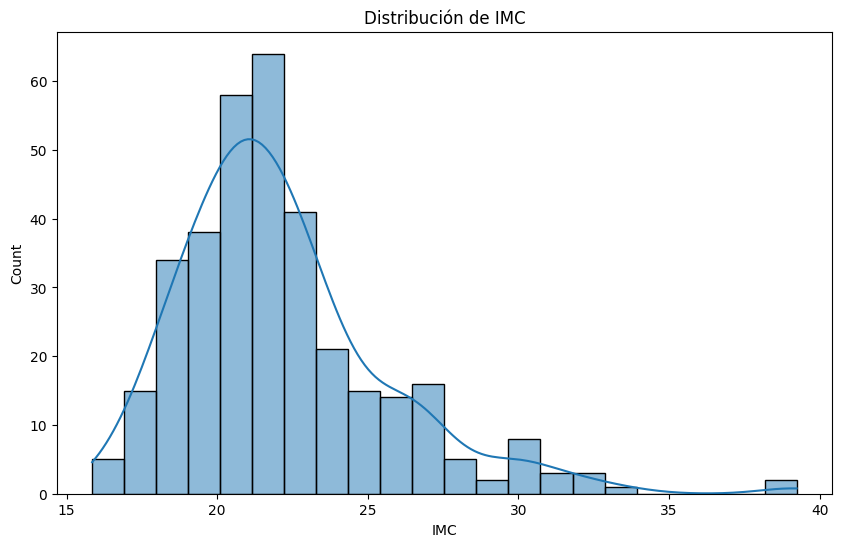

In [220]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_merged, x='IMC', kde=True)
plt.title('Distribución de IMC')
plt.show()

Podemos ver como la distribucion esta asimetrica hacia la derecha.

### Ejercicio 3

In [221]:
# La forma más directa
df_merged['fumador'] = (df_merged['NUM_CIGARRILLOS_DIA'] > 0).astype(int)

In [222]:
fumadores = df_merged['fumador'].value_counts()
porcentaje_fumadores = (fumadores[1]/len(df_merged))*100
print(f'Un {porcentaje_fumadores:.2f}% Fuma mas de un cigarro por dia mientras que el otro {100-porcentaje_fumadores:.2f}% no fuma ningun cigarro por dia')

Un 55.94% Fuma mas de un cigarro por dia mientras que el otro 44.06% no fuma ningun cigarro por dia


### Ejercicio 4

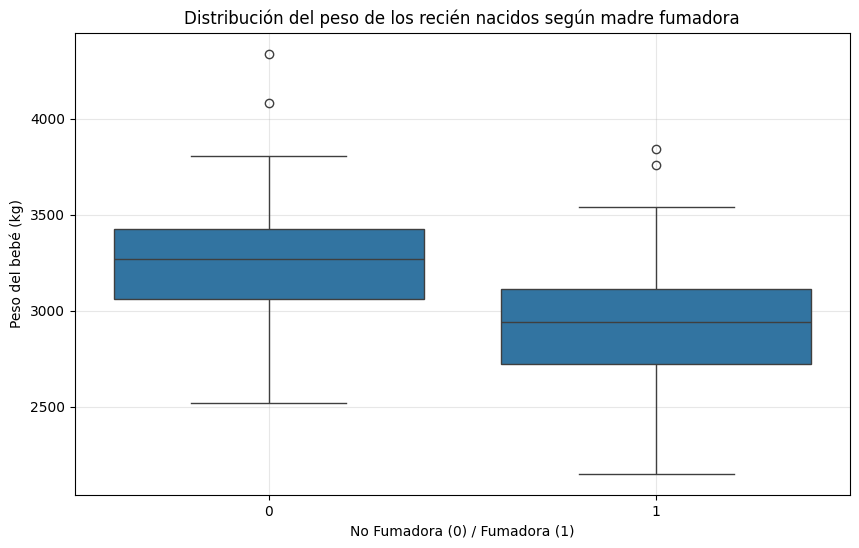

In [223]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fumador', y='peso_kg_bebe', data=df_merged)
plt.title('Distribución del peso de los recién nacidos según madre fumadora')
plt.xlabel('No Fumadora (0) / Fumadora (1)')
plt.ylabel('Peso del bebé (kg)')
plt.grid(True, alpha=0.3)
plt.show()

Podemos ver que los pesos de los hijos de las madres fumadoras tienden a pesar menos que los hijos de madres no fumadoras

### Ejercicio 5

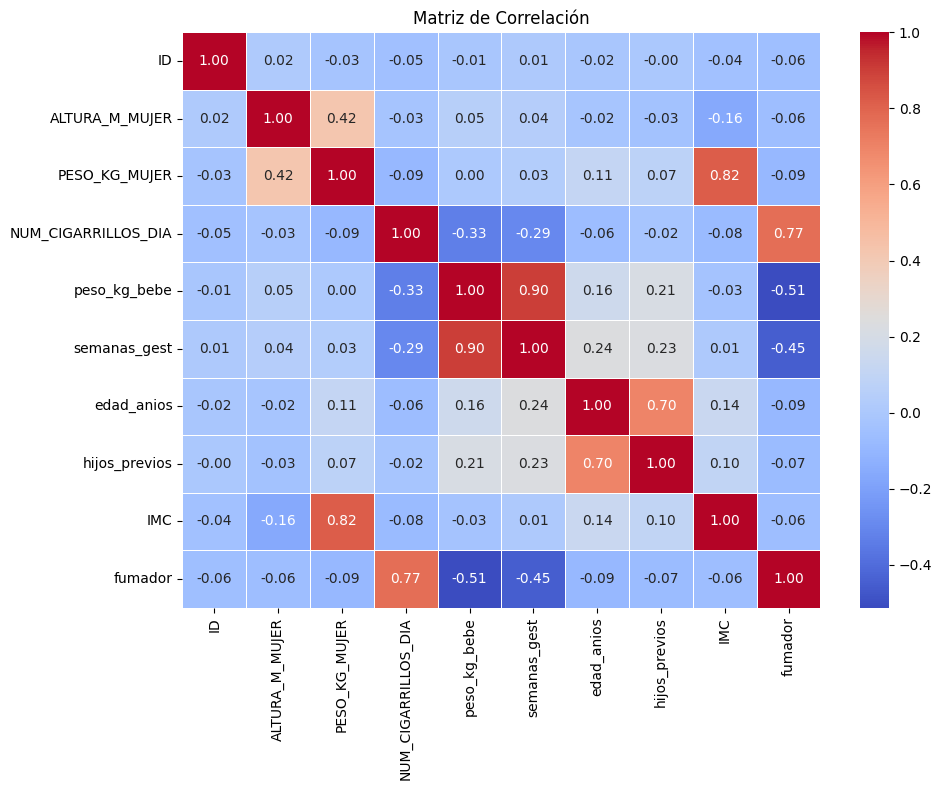

In [224]:
corr_matrix = df_merged.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

In [225]:
corr_matrix

,ID,ALTURA_M_MUJER,PESO_KG_MUJER,NUM_CIGARRILLOS_DIA,peso_kg_bebe,semanas_gest,edad_anios,hijos_previos,IMC,fumador
ID,1.000000,0.019073,-0.027006,-0.050297,-0.014953,0.012324,-0.015486,-0.003481,-0.042099,-0.056279
ALTURA_M_MUJER,0.019073,1.000000,0.422863,-0.027125,0.053610,0.040906,-0.019630,-0.034787,-0.160836,-0.059141
PESO_KG_MUJER,-0.027006,0.422863,1.000000,-0.087921,0.001569,0.033818,0.112308,0.074303,0.822652,-0.087737
NUM_CIGARRILLOS_DIA,-0.050297,-0.027125,-0.087921,1.000000,-0.330794,-0.294905,-0.063671,-0.021141,-0.078575,0.769035
peso_kg_bebe,-0.014953,0.053610,0.001569,-0.330794,1.000000,0.903490,0.157501,0.210663,-0.033207,-0.512531
semanas_gest,0.012324,0.040906,0.033818,-0.294905,0.903490,1.000000,0.236312,0.226549,0.011983,-0.448180
edad_anios,-0.015486,-0.019630,0.112308,-0.063671,0.157501,0.236312,1.000000,0.695034,0.135988,-0.092448
hijos_previos,-0.003481,-0.034787,0.074303,-0.021141,0.210663,0.226549,0.695034,1.000000,0.096132,-0.073968
IMC,-0.042099,-0.160836,0.822652,-0.078575,-0.033207,0.011983,0.135988,0.096132,1.000000,-0.057992
fumador,-0.056279,-0.059141,-0.087737,0.769035,-0.512531,-0.448180,-0.092448,-0.073968,-0.057992,1.000000


Podemos ver como la relacion mas fuerte que tenemos es la de las semanas de gestacion con el peso de los kgs del bebe, seguido de que el peso kg de mujer con el imc, pero a este lo vamos a ignorar ya que imc lo creamos para uun ejercicio en particular al igual que fumador y num cigarrillos lo ignoramos ya que es una variable creada para otro ejercicio.
Lo que no podemos ignorar es que los hijos previos con la edad de la mujer, ya que por lo general a mas años mas hijos tuvo.

### Ejercicio 6

In [226]:
X = df_merged[['ALTURA_M_MUJER', 'PESO_KG_MUJER', 'NUM_CIGARRILLOS_DIA',
               'semanas_gest', 'edad_anios', 'hijos_previos', 'IMC']]
X = sm.add_constant(X)
y = df_merged['peso_kg_bebe']

In [227]:
modelo = sm.OLS(y, X).fit()


In [228]:
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:           peso_kg_bebe   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     235.9
Date:                Thu, 27 Feb 2025   Prob (F-statistic):          9.54e-126
Time:                        19:09:42   Log-Likelihood:                -2187.2
No. Observations:                 345   AIC:                             4390.
Df Residuals:                     337   BIC:                             4421.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1252.3218   1

El valor p>|t| representa la probabilidad de observar un valor del estadístico t igual o más extremo que el calculado, bajo la hipótesis nula de que el coeficiente es igual a cero. En términos simples:

- Un p-valor pequeño (generalmente < 0.05) indica evidencia suficiente para rechazar la hipótesis nula, sugiriendo que la variable es estadísticamente significativa para el modelo.
- Un p-valor grande indica que no hay suficiente evidencia para afirmar que esa variable tiene un efecto real sobre la variable dependiente.

En tu resultado, las variables con p<0.01 (semanas_gest, NUM_CIGARRILLOS_DIA, edad_anios, hijos_previos) son estadísticamente significativas al nivel del 1%, lo que significa que es muy improbable (menos del 1% de probabilidad) que su efecto sobre el peso del bebé sea debido al azar.


- El valor t es coef/stdE
- Mide cuantas desviaciones estandar se aleja el coeficiente estimado de CERO
- Valores absolutos grandes indican que el coeficiente probablemente no es 0


In [229]:
significativas = []
for variable, p_valor in zip(X.columns[1:], modelo.pvalues[1:]):
    if p_valor*100 < 1:
        significativas.append((variable, p_valor))
        
print("\nVariables significativas al 1%:")
for var, p in significativas:
    print(f"{var}: p-valor = {(p*100):.3f}%")


Variables significativas al 1%:
NUM_CIGARRILLOS_DIA: p-valor = 0.115%
semanas_gest: p-valor = 0.000%
edad_anios: p-valor = 0.036%
hijos_previos: p-valor = 0.436%


#### Ejercicio B
No es necesario ajustar ya que 4 de 6 variables predictoras son significativas al 1% por ende las unicas 2 columnas que se podrian eliminar son las de la altura y el peso de la mujer ya que no son significativas al 1%.

#### Ejercicio C

peso_kg_bebe = -1252.3218 - 330.2495×ALTURA_M_MUJER + 5.1011×PESO_KG_MUJER -7.2280×NUM_CIGARRILLOS_DIA + 131.3711×semanas_gest -6.6486×edad_anios + 17.2080×hijos_previos -17.6277xIMC

#### Ejercicio D

In [231]:
peso_kg_bebe = -1252.3218 -17.6277*19.5 + 131.3711*38 -6.6486*25
print(f'El peso del bebe es: {peso_kg_bebe:.2f} Gramos')

El peso del bebe es: 3229.82 Gramos


#### Ejercicio E

In [233]:
df_merged['peso_predicho']= modelo.predict(X)

In [235]:
df_merged['residuos']=df_merged['peso_kg_bebe']-df_merged['peso_predicho']

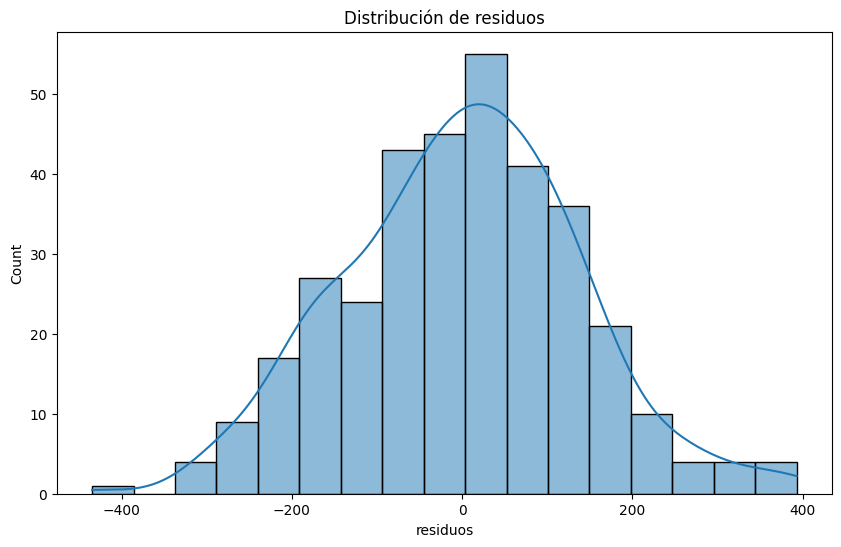

In [237]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_merged, x='residuos', kde=True)
plt.title('Distribución de residuos')
plt.show()

Bueno como podemos ver tenemos forma de campana, que tiende a ser normal, por ende no podemos negar la normalidad.